In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 


In [21]:
data = pd.read_excel('./annex_1_complaint_report.xlsx', header = 0)
# Mostrar las primeras filas para comprobar que se han cargado correctamente
print(data.head())

   talk_time  duration media_type  case_number  email_subject  \
0        913      1012      VOICE          NaN  No disponible   
1        328       556      VOICE          NaN  No disponible   
2        413       779      VOICE          NaN  No disponible   
3        140       292      VOICE          NaN  No disponible   
4        185       249      VOICE          NaN  No disponible   

                Comments                           call Id  
0        Malas \nmedidas  11D2F6EAA16B4E32BC16AF65E883D25F  
1  Medidas \nincorrectas  E37FEA3A6DD140F093F0C78E570FFA27  
2  Medidas \nincorrectas  17566D0DC8AA46DDBD57EA940CE0CB48  
3       Entregas \ntarde  4C3D49E3A37149738F95B26CF52D4B61  
4        Malas \nmedidas  E3FADE0FAD7440F3B34A8938CC9B075D  


In [22]:
# Supongamos que queremos analizar la frecuencia de una columna específica llamada 'columna_de_interes'
comments_column = 'Comments'

# Calcular la frecuencia de los valores en la columna seleccionada
frecuencias = data[comments_column].value_counts()
frecuencias = frecuencias.sort_values(ascending=False)

# Calcular la frecuencia de los valores en la columna seleccionada
frecuencias_respuesta = data[comments_column].value_counts()
frecuencias_pregunta = data[comments_column].value_counts()

# Calcular la frecuencia acumulada
frecuencia_acumulada = frecuencias.cumsum() / frecuencias.sum() * 100

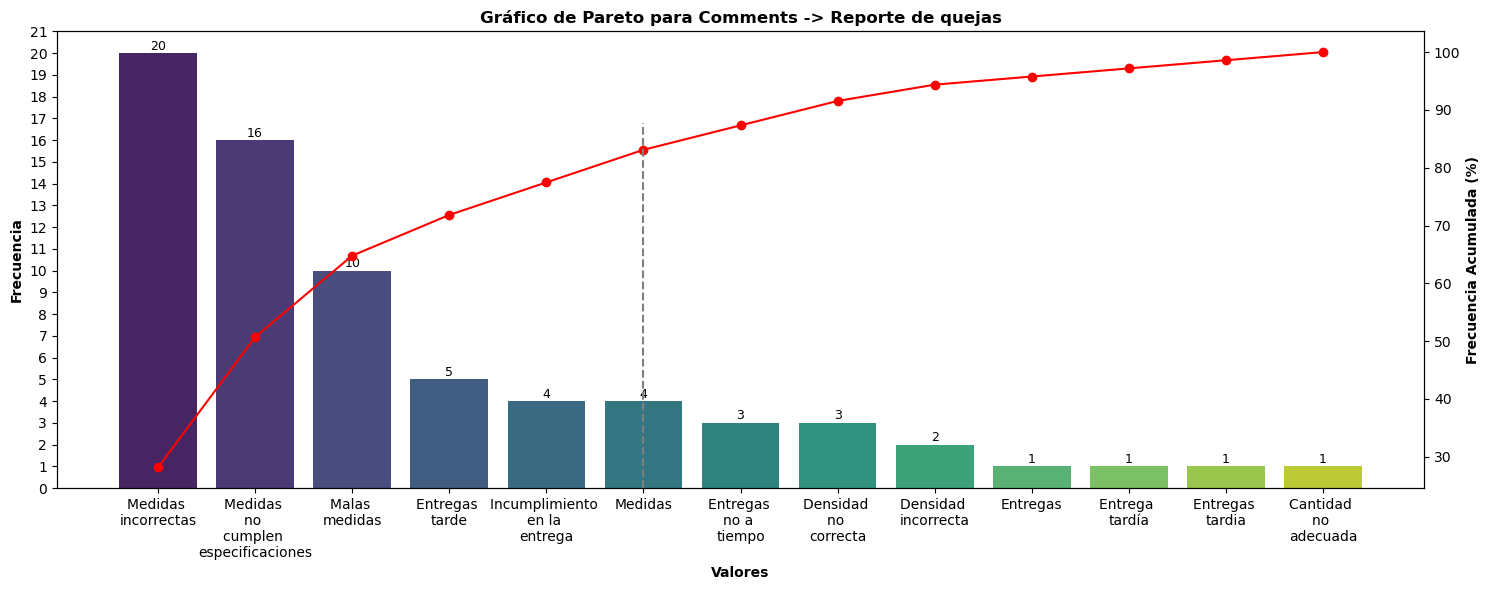

In [31]:
# Crear el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(15, 6))

# Gráfico de barras (izquierda)
sns.barplot(x=frecuencias.index, y=frecuencias.values, palette='viridis', ax=ax1)
ax1.set_ylabel('Frecuencia', fontweight='bold')

# Configurar el intervalo en el eje y
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))  # Mostrar valores de 1 en 1 en el eje y

# Gráfico de líneas (derecha) para la frecuencia acumulada
ax2 = ax1.twinx()
ax2.plot(frecuencia_acumulada.index, frecuencia_acumulada.values, color='red', marker='o')
ax2.set_ylabel('Frecuencia Acumulada (%)', fontweight='bold')

# Añadir línea punteada en el 80% de la frecuencia acumulada
punto_80 = frecuencia_acumulada[frecuencia_acumulada >= 80].index[0]
plt.axvline(x=punto_80, color='gray', linestyle='--', ymin=0, ymax=80/100, label='80% Frecuencia Acumulada')

# Ajustes de formato
ax1.set_xlabel('Valores', fontweight='bold')
ax1.set_title('Gráfico de Pareto para {} -> Reporte de quejas'.format(comments_column), fontweight='bold')

# Rotar etiquetas en el eje x verticalmente
plt.xticks(rotation='vertical')

# Agregar etiquetas a las barras
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()